##### Teoria de Carteiras de Markowitz
Universidade de São Paulo  
Contabilidade para Computação  
Prof. Dr. Francisco Carlos Barbosa do Santos  

| Nome | Número USP | Email
| ----------- | ----------- | -----------
| Gabriel Felix de Souza Lopes | 11295682 | gafelix@usp.br
| João Guilherme da Costa Seike | 9784634 | jgseike@usp.br

Este trabalho tem como objetivo calcular o retorno e risco de uma carteira e criar a fronteira eficiente através de simulações de várias carteiras possíveis.

Para começar, a carteira será composta pelas ações da Amazon, Google, Netflix e Microsoft, em 2010. A seguir, as bibliotecas são importadas e o dataset carregado.

In [70]:
""" Importa bibliotecas necessárias """

import pandas as pd 
from pandas_datareader import data

In [71]:
""" Cria dataset com ações da Amazon, Google, Netflix e Microsfot """

df = pd.DataFrame()
df['AMZN'] = data.DataReader('AMZN', data_source='yahoo', start='1-1-2010')['Close']
df['GOOG'] = data.DataReader('GOOG', data_source='yahoo', start='1-1-2010')['Close']
df['MSFT'] = data.DataReader('MSFT', data_source='yahoo', start='1-1-2010')['Close']
df['NFLX'] = data.DataReader('NFLX', data_source='yahoo', start='1-1-2010')['Close']
df.head()

,AMZN,GOOG,MSFT,NFLX
Date,,,,
2010-01-04,6.6950,15.610239,30.950001,7.640000
2010-01-05,6.7345,15.541497,30.959999,7.358571
2010-01-06,6.6125,15.149715,30.770000,7.617143
2010-01-07,6.5000,14.797037,30.450001,7.485714
2010-01-08,6.6760,14.994298,30.660000,7.614286


O primeiro problema consiste em calcular o retorno e risco de uma carteira, usando uma base anual. Isso é feito pela função 'calcular_dados_carteira' que, dado um dataset de retornos n dimensional, calcula o retorno que é a média ponderada dos retornos de cada ativo. Sempre são considerados 252 dias úteis de negociação dos ativos.

Depois, o risco é calculado utilizando a matriz de covariância entre os ativos ponderado pelos pesos. Note que o sharpe é apenas a medida de ganho por unidade de risco.

Várias carteiras são geradas com pesos aleatórios e calculados os retorno, risco e sharpe.

In [72]:
""" Importa biblioteca necessária """

import numpy as np

def criar_n_numeros_aleatorios(n: int) -> list:
    k = np.random.rand(n)
    return k / sum(k)

def calcular_dados_carteira(retornos):
    pesos = np.asarray(criar_n_numeros_aleatorios(retornos.shape[1]))
    retorno = np.mean((np.mean(retornos, axis=0) * pesos)) * 252
    matriz_covariancia = np.asmatrix(np.cov(retornos, rowvar=False))
    pesos = np.asmatrix(pesos)
    risco = np.sqrt(pesos * matriz_covariancia * pesos.T) * np.sqrt(252)
    sharpe = retorno / risco
    return float(risco), float(retorno), float(sharpe), pesos

numpy_df = df.pct_change().dropna().to_numpy()
numero_carteiras, carteiras = 500, list()
sharpe = list()
pesos = list()
for carteira in range(numero_carteiras):
    dados = calcular_dados_carteira(numpy_df)
    carteiras.append((dados[0], dados[1]))
    sharpe.append(dados[2])
    pesos.append(dados[3])

Então, é possível visualizar a seguir o plot de todas as carteiras geradas. O ponto em vermelho indica o "maior sharpe" da fronteira de eficiência, sendo o ponto tangente a ela. Isso significa que essa carteira possui o maior ganho real por unidade de risco. Quanto mais verde o ponto, melhor a carteira.

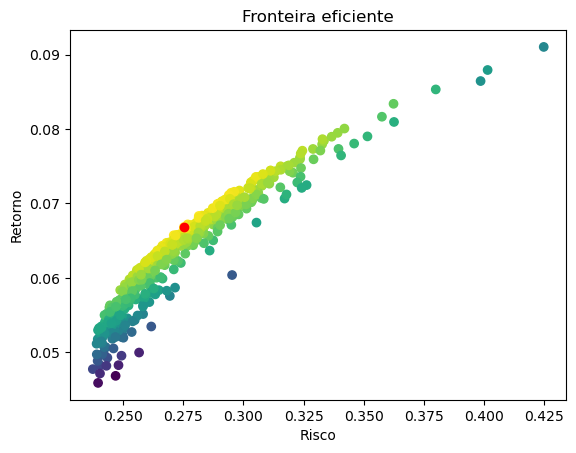

In [73]:
import matplotlib.pyplot as plt

indice = np.array(sharpe).argmax()
axis = list(zip(*carteiras))
best_x, best_y = axis[0][indice], axis[1][indice]
plt.scatter(axis[0], axis[1], c = sharpe, cmap = 'viridis')
plt.scatter(best_x, best_y, c = 'red')
plt.title("Fronteira eficiente")
plt.xlabel("Risco")
plt.ylabel("Retorno")
plt.show()

E a melhor distribuição de pesos é...

In [74]:
print(f'Melhor distribuição\n{pesos[indice]}')

Melhor distribuição
[[0.29608746 0.00476922 0.43326132 0.265882  ]]
